In [1]:
############################## IMPORTS ##############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Organisation des données

In [2]:
#convertir le csv en pandas dataframe
dataframe = pd.read_csv('export_IA.csv', sep=',', engine='c', encoding='utf-8', low_memory=False)

# Découverte des données

### Valeur cible (gravité de l’accident) pour la classification = classe

In [3]:
#compte les différents résultats pour chaque colonne
for i in range(len(dataframe.columns)):
    print("Valeur cible", i+1,  ": ", dataframe.columns[i], " - ", len(dataframe[dataframe.columns[i]].unique()))

Valeur cible 1 :  id_code_insee  -  8258
Valeur cible 2 :  Num_Acc  -  40250
Valeur cible 3 :  num_veh  -  58
Valeur cible 4 :  id_usa  -  73643
Valeur cible 5 :  date  -  29950
Valeur cible 6 :  ville  -  8078
Valeur cible 7 :  latitude.x  -  1253
Valeur cible 8 :  longitude.x  -  1495
Valeur cible 9 :  descr_cat_veh  -  24
Valeur cible 10 :  descr_agglo  -  2
Valeur cible 11 :  descr_athmo  -  9
Valeur cible 12 :  descr_lum  -  5
Valeur cible 13 :  descr_etat_surf  -  9
Valeur cible 14 :  description_intersection  -  9
Valeur cible 15 :  an_nais  -  101
Valeur cible 16 :  age  -  101
Valeur cible 17 :  place  -  10
Valeur cible 18 :  descr_dispo_secu  -  15
Valeur cible 19 :  descr_grav  -  4
Valeur cible 20 :  descr_motif_traj  -  6
Valeur cible 21 :  descr_type_col  -  7
Valeur cible 22 :  department_name  -  89
Valeur cible 23 :  department_number  -  89
Valeur cible 24 :  region_name  -  17


### Nombre d'instances

In [4]:
#compte le nombre d'instances et renvoie juste le nombre
print("Nombre d'instances : ", len(dataframe.index))

Nombre d'instances :  73643


### Nombre d'instances par classe

<Axes: xlabel='descr_grav'>

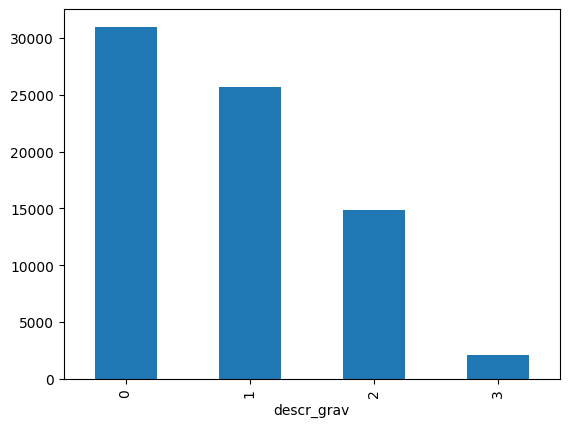

In [5]:

#creer un tableau qui affiche les données selon les descr_grav
graphique1 = dataframe.groupby('descr_grav').size()
#représenter en graphique 
graphique1.plot.bar()

### Taille des features

In [6]:
# Taille des features
print("Taille des features : ", len(dataframe.columns)-1)

Taille des features :  23


# Préparation des données

In [8]:
import sys
sys.maxsize

9223372036854775807

In [10]:
# préparation des données, conversions des dates et des heures en entier sans les séparateurs
dataframe['date'] = pd.to_datetime(dataframe['date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y%m%d%H%M%S').astype(int)

print(dataframe.head())

OverflowError: Python int too large to convert to C long

In [ ]:
# Transformartion des codes_insee en entier, en remplacant les A et B par 0
dataframe['id_code_insee'] = dataframe['id_code_insee'].str.replace('A', '0')
dataframe['id_code_insee'] = dataframe['id_code_insee'].str.replace('B', '0')

# On supprime la colonne 'num_veh' et 'ville' car elles ne nous sont pas utiles
dataframe = dataframe.drop('num_veh', axis=1)
dataframe = dataframe.drop('ville', axis=1)

In [ ]:
# On tranforme la colonne 'descr_type_col' en entier
echelle = dataframe['descr_type_col'].unique()
dataframe['descr_type_col'] = dataframe['descr_type_col'].replace(echelle, [0,1,2,3,4,5,6])

In [ ]:
# On transforme la colonne 'descr_dispo_secu' en entier
echelle = dataframe['descr_dispo_secu'].unique()
dataframe['descr_dispo_secu'] = dataframe['descr_dispo_secu'].replace(echelle, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])

In [ ]:
# On supprime la colonne 'department_name' car elle ne nous est pas utile
dataframe = dataframe.drop('department_name', axis=1)

In [ ]:
# On ajoute une colonne 'region_number' qui contient le numéro de la région selon le region_name
REGIONS = {
    'auvergne-rhône-alpes': '84',
    'bourgogne-franche-comté': '27',
    'bretagne': '53',
    'centre-val de loire': '24',
    'corse': '94',
    'grand est': '44',
    'guadeloupe': '01',
    'guyane': '03',
    'hauts-de-france': '32',
    'île-de-france': '11',
    'la réunion': '04',
    'martinique': '02',
    'normandie': '28',
    'nouvelle-aquitaine': '75',
    'occitanie': '76',
    'pays de la loire': '52',
    'provence-alpes-côte d\'azur': '93'
}

# On ajoute une colonne 'region_number' qui contient le numéro de la région selon le region_name et REGIONS
# On met en minuscule les clés de régions pour éviter les erreurs
dataframe['region_number'] = dataframe['region_name'].replace(REGIONS)
dataframe = dataframe.drop('region_name', axis=1)

In [ ]:
# On remplace le A et le B par un 0 dans le departement_number
dataframe['department_number'] = dataframe['department_number'].str.replace('A', '0')
dataframe['department_number'] = dataframe['department_number'].str.replace('B', '0')

In [ ]:
dataframe.tail(100)